## Car Price Pred

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import warnings
import seaborn as sns 

## Importing the file

In [2]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Machine Learning Module\\Regression Datasets\\Car details v3.csv')

In [3]:
df.head()

,name,Brand_Name,year,Present_Age_in_yrs,km_driven,fuel,seller_type,transmission,owner,mileage,mileage_no,engine,engine_cc,max_power,max_power_no,torque,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,2014,7,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,23.40,1248 CC,1248.0,74 bhp,74.00,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,7,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,21.14,1498 CC,1498.0,103.52 bhp,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,Honda,2006,15,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,17.70,1497 CC,1497.0,78 bhp,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,2010,11,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,23.00,1396 CC,1396.0,90 bhp,90.00,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,2007,14,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,16.10,1298 CC,1298.0,88.2 bhp,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,130000


In [4]:
df.shape

(8128, 18)

## Dropping unwanted columns i.e the qualitative columns

In [5]:
df=df.drop(columns=['name','torque','mileage','engine','max_power','year'])

In [6]:
df.shape

(8128, 12)

In [7]:
df.head()

,Brand_Name,Present_Age_in_yrs,km_driven,fuel,seller_type,transmission,owner,mileage_no,engine_cc,max_power_no,seats,selling_price
0,Maruti,7,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Skoda,7,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda,15,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Hyundai,11,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Maruti,14,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


In [8]:
df.isnull().sum()

Brand_Name              0
Present_Age_in_yrs      0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage_no            221
engine_cc             221
max_power_no          222
seats                 221
selling_price           0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.shape

(7906, 12)

In [11]:
df.isnull().sum()

Brand_Name            0
Present_Age_in_yrs    0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage_no            0
engine_cc             0
max_power_no          0
seats                 0
selling_price         0
dtype: int64

## Plotting histograms

array([[<AxesSubplot:title={'center':'Present_Age_in_yrs'}>,
        <AxesSubplot:title={'center':'km_driven'}>],
       [<AxesSubplot:title={'center':'mileage_no'}>,
        <AxesSubplot:title={'center':'engine_cc'}>],
       [<AxesSubplot:title={'center':'max_power_no'}>,
        <AxesSubplot:title={'center':'selling_price'}>]], dtype=object)

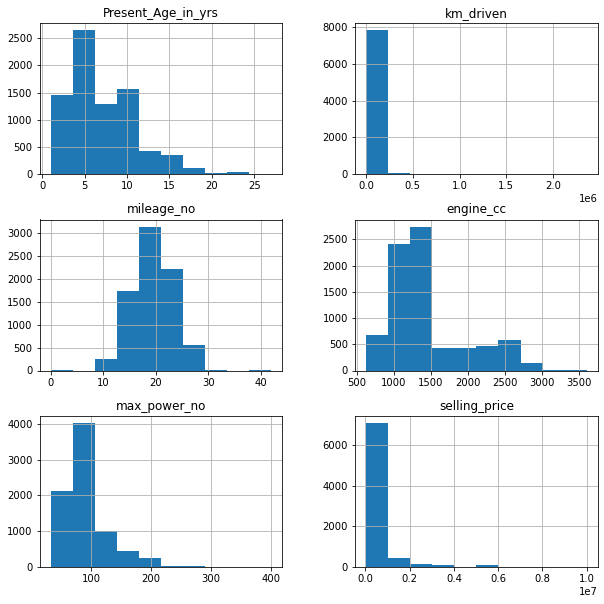

In [12]:
df.hist(['Present_Age_in_yrs','km_driven','mileage_no','engine_cc','max_power_no','selling_price'],figsize=(10,10))

## Scatter Plot continuous variables

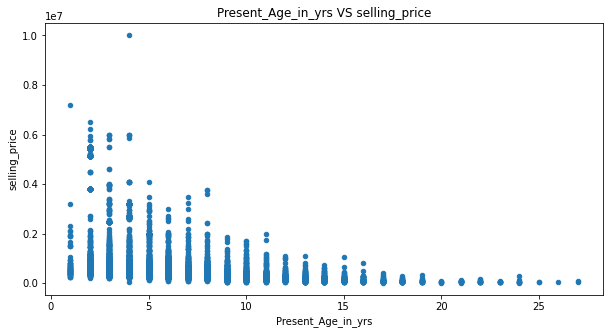

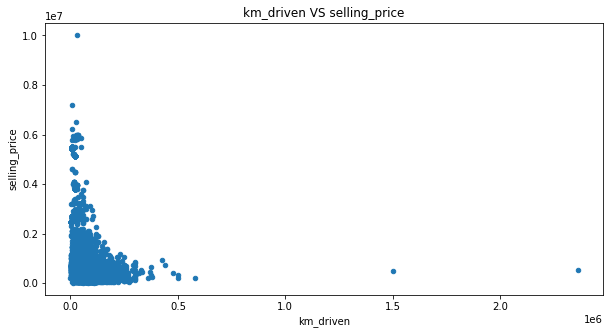

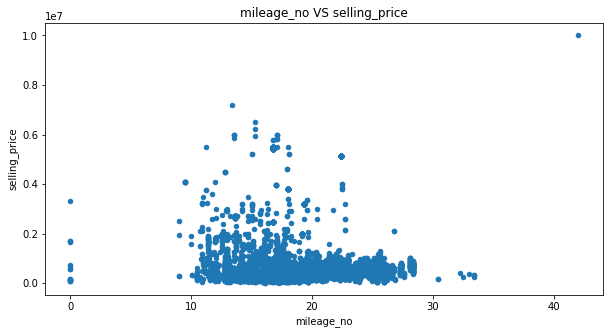

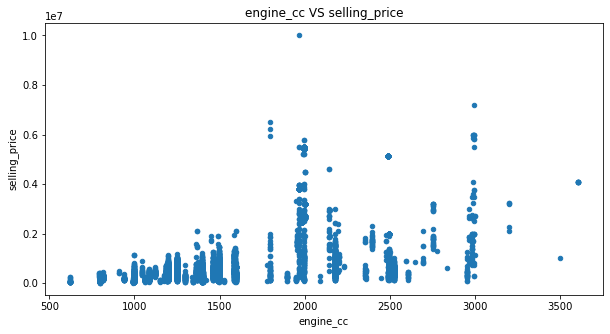

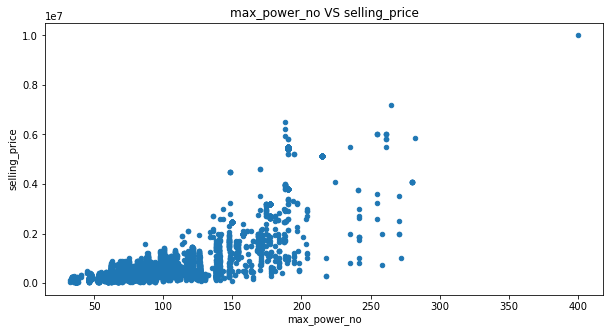

In [13]:
ContinuousCols=['Present_Age_in_yrs','km_driven','mileage_no','engine_cc','max_power_no']
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='selling_price', figsize=(10,5), title=predictor+" VS "+ 'selling_price')

## Correlation

In [14]:
ContinuousCols=['Present_Age_in_yrs','km_driven','mileage_no','engine_cc','max_power_no','selling_price']
Corr=df[ContinuousCols].corr()

In [15]:
Corr

,Present_Age_in_yrs,km_driven,mileage_no,engine_cc,max_power_no,selling_price
Present_Age_in_yrs,1.000000,0.428548,-0.328544,-0.018263,-0.226598,-0.412302
km_driven,0.428548,1.000000,-0.172980,0.206031,-0.038159,-0.222158
mileage_no,-0.328544,-0.172980,1.000000,-0.576408,-0.374621,-0.126280
engine_cc,-0.018263,0.206031,-0.576408,1.000000,0.703975,0.455682
max_power_no,-0.226598,-0.038159,-0.374621,0.703975,1.000000,0.749674
selling_price,-0.412302,-0.222158,-0.126280,0.455682,0.749674,1.000000


<AxesSubplot:>

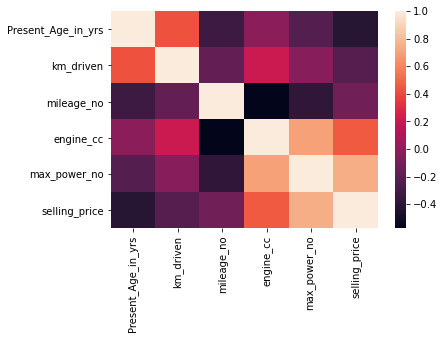

In [16]:
sns.heatmap(Corr)

In [17]:
Corr['selling_price'][abs(Corr['selling_price'])>0.5]

max_power_no     0.749674
selling_price    1.000000
Name: selling_price, dtype: float64

Lowering the threshold

In [18]:
Corr['selling_price'][abs(Corr['selling_price'])>0.3]

Present_Age_in_yrs   -0.412302
engine_cc             0.455682
max_power_no          0.749674
selling_price         1.000000
Name: selling_price, dtype: float64

## ANOVA test

In [19]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [20]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Brand_Name ','fuel','seller_type','transmission','owner','seats']
FunctionAnova(inpData=df, 
              TargetVariable='selling_price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Brand_Name  is correlated with selling_price | P-Value: 0.0
fuel is correlated with selling_price | P-Value: 2.52340474514499e-74
seller_type is correlated with selling_price | P-Value: 1.28038997597335e-310
transmission is correlated with selling_price | P-Value: 0.0
owner is correlated with selling_price | P-Value: 3.317943590288519e-131
seats is correlated with selling_price | P-Value: 2.0630652802523846e-10


['Brand_Name ', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [21]:
df.columns

Index(['Brand_Name ', 'Present_Age_in_yrs', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage_no', 'engine_cc', 'max_power_no',
       'seats', 'selling_price'],
      dtype='object')

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [22]:
SelectedColumns=['Present_Age_in_yrs','km_driven','engine_cc','max_power_no', 'fuel', 'seller_type', 'transmission', 'owner', 'seats','selling_price']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,Present_Age_in_yrs,km_driven,engine_cc,max_power_no,fuel,seller_type,transmission,owner,seats,selling_price
0,7,145500,1248.0,74.00,Diesel,Individual,Manual,First Owner,5.0,450000
1,7,120000,1498.0,103.52,Diesel,Individual,Manual,Second Owner,5.0,370000
2,15,140000,1497.0,78.00,Petrol,Individual,Manual,Third Owner,5.0,158000
3,11,127000,1396.0,90.00,Diesel,Individual,Manual,First Owner,5.0,225000
4,14,120000,1298.0,88.20,Petrol,Individual,Manual,First Owner,5.0,130000


In [23]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Categorical Handling

In [24]:
DataForML['fuel']=DataForML['fuel'].replace({'Diesel':1,'Petrol':2,'LPG':3,'CNG':4})
DataForML['seller_type']=DataForML['seller_type'].replace({'Individual':1,'Dealer':2,'Trustmark Dealer':3})
DataForML['transmission']=DataForML['transmission'].replace({'Manual':1,'Automatic':2})
DataForML['owner']=DataForML['owner'].replace({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

<ipython-input-24-65aa600e42e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['fuel']=DataForML['fuel'].replace({'Diesel':1,'Petrol':2,'LPG':3,'CNG':4})
<ipython-input-24-65aa600e42e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['seller_type']=DataForML['seller_type'].replace({'Individual':1,'Dealer':2,'Trustmark Dealer':3})
<ipython-input-24-65aa600e42e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## Algorithms without the brand name

In [25]:
DataForML.head()

,Present_Age_in_yrs,km_driven,engine_cc,max_power_no,fuel,seller_type,transmission,owner,seats,selling_price
0,7,145500,1248.0,74.00,1,1,1,1,5.0,450000
1,7,120000,1498.0,103.52,1,1,1,2,5.0,370000
2,15,140000,1497.0,78.00,2,1,1,3,5.0,158000
3,11,127000,1396.0,90.00,1,1,1,1,5.0,225000
4,14,120000,1298.0,88.20,2,1,1,1,5.0,130000


In [26]:
DataForML.columns

Index(['Present_Age_in_yrs', 'km_driven', 'engine_cc', 'max_power_no', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'selling_price'],
      dtype='object')

In [27]:
## Target Variable and Predictors
TargetVariable='selling_price'
Predictors=['Present_Age_in_yrs','km_driven','engine_cc', 'max_power_no', 'fuel',
       'seller_type', 'transmission', 'seats']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

#Split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [28]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5534, 8)
(5534,)
(2372, 8)
(2372,)


In [30]:
PredictorScalerFit.inverse_transform(X)

array([[7.000e+00, 1.455e+05, 1.248e+03, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       [7.000e+00, 1.200e+05, 1.498e+03, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       [1.500e+01, 1.400e+05, 1.497e+03, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       ...,
       [1.200e+01, 1.200e+05, 1.248e+03, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       [8.000e+00, 2.500e+04, 1.396e+03, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       [8.000e+00, 2.500e+04, 1.396e+03, ..., 1.000e+00, 1.000e+00,
        5.000e+00]])

## Multiple Linear Regression

In [31]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['selling_price']-TestingDataResults['selling_price']))/TestingDataResults['selling_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.66644858958083

##### Model Validation and Accuracy Calculations ##########
   selling_price  Predictedselling_price
0         501000                490697.0
1         440000                382961.0
2         140000                114631.0
3         476999                469981.0
4         620000               1086480.0
Mean Accuracy on test data: 100.0
Median Accuracy on test data: 100.0

Accuracy values for 10-fold Cross Validation:
 [29.62224521 21.67725304  9.8009384  28.11508625 27.66261151 31.44662041
 15.42580811  9.90691537 17.82508985 17.84080829]

Final Average Accuracy of the model: 20.93


In [32]:
TestingDataResults.head()

,Present_Age_in_yrs,km_driven,engine_cc,max_power_no,fuel,seller_type,transmission,seats,selling_price,Predictedselling_price,APE
0,0.230769,0.028808,0.209396,0.112200,0.000000,0.5,0.0,0.25,501000,490697.0,0.0
1,0.192308,0.046601,0.209396,0.112200,0.000000,0.0,0.0,0.25,440000,382961.0,0.0
2,0.307692,0.078374,0.262081,0.101307,0.000000,0.0,0.0,0.25,140000,114631.0,0.0
3,0.307692,0.038128,0.248322,0.148148,0.000000,0.0,0.0,0.25,476999,469981.0,0.0
4,0.076923,0.006354,0.192282,0.133442,0.333333,0.0,1.0,0.25,620000,1086480.0,0.0


## Decision trees

In [33]:
# Decision trees
from sklearn.tree import DecisionTreeRegressor 
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['selling_price']-TestingDataResults['selling_price']))/TestingDataResults['selling_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeRegressor(max_depth=3)
R2 Value: 0.8545059151167468

##### Model Validation and Accuracy Calculations ##########
   selling_price  Predictedselling_price
0         501000                607150.0
1         440000                607150.0
2         140000                282721.0
3         476999                282721.0
4         620000                607150.0
Mean Accuracy on test data: 100.0
Median Accuracy on test data: 100.0

Accuracy values for 10-fold Cross Validation:
 [48.82109599 48.68732651 43.64339833 48.41512452 49.26456305 50.32825921
 48.9496743  42.4116654  44.05117836 46.49736755]

Final Average Accuracy of the model: 47.11


## Random Forest

RandomForestRegressor(max_depth=10, n_estimators=1000)
R2 Value: 0.987000056305105

##### Model Validation and Accuracy Calculations ##########
   selling_price  Predictedselling_price
0         501000                460921.0
1         440000                531189.0
2         140000                209443.0
3         476999                344373.0
4         620000                619824.0
Mean Accuracy on test data: 82.45030749604305
Median Accuracy on test data: 88.75965360501567

Accuracy values for 10-fold Cross Validation:
 [83.8196812  83.02504048 80.65640642 83.22246649 82.88902311 82.82453904
 82.87569918 81.83548368 82.32733123 81.61174114]

Final Average Accuracy of the model: 82.51


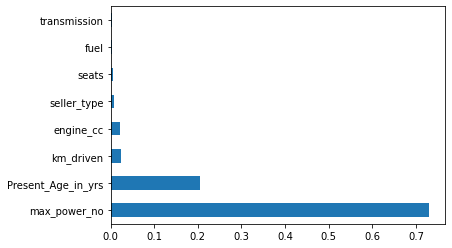

In [34]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=1000,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['selling_price']-TestingDataResults['Predictedselling_price']))/TestingDataResults['selling_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9922519649626008

##### Model Validation and Accuracy Calculations ##########
   selling_price  Predictedselling_price
0         501000                455682.0
1         440000                537800.0
2         140000                203881.0
3         476999                357452.0
4         620000                626619.0
Mean Accuracy on test data: 82.74580049384113
Median Accuracy on test data: 88.64705831764486

Accuracy values for 10-fold Cross Validation:
 [84.32745878 83.39419154 80.90589125 83.86884731 82.96588544 83.93987556
 83.18653813 81.95710115 82.77100035 82.16454755]

Final Average Accuracy of the model: 82.95


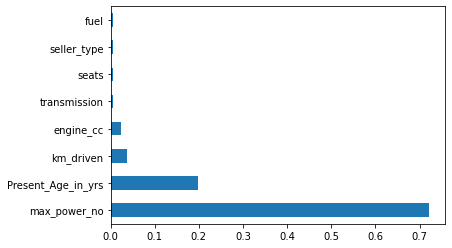

In [35]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 5 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['selling_price']-TestingDataResults['Predictedselling_price']))/TestingDataResults['selling_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Xtreme Gradient Boosting (XGBoost)

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=9,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[20:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9985839661310552

##### Model Validation and Accuracy Calculations ##########
   selling_price  Predictedselling_price
0         501000                514930.0
1   

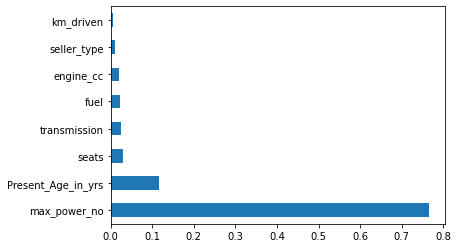

In [36]:

from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=9, 
                      learning_rate=0.1, 
                      n_estimators=500, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['selling_price']-TestingDataResults['Predictedselling_price']))/TestingDataResults['selling_price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [37]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['selling_price']-TestingDataResults['Predictedselling_price']))/TestingDataResults['selling_price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9702827961051452

##### Model Validation and Accuracy Calculations ##########
   selling_price  Predictedselling_price
0         501000                476333.0
1         440000                475000.0
2         140000                192667.0
3         476999                363333.0
4         620000                585333.0
Mean Accuracy on test data: 80.54883595361184
Median Accuracy on test data: 87.25470588235294

Accuracy values for 10-fold Cross Validation:
 [82.11184658 80.2296643  78.40706167 81.60833495 81.1393257  82.64482442
 81.17637649 80.04972317 81.33224161 79.9516986 ]

Final Average Accuracy of the model: 80.87


In [38]:
TestingDataResults.head()

,Present_Age_in_yrs,km_driven,engine_cc,max_power_no,fuel,seller_type,transmission,seats,selling_price,Predictedselling_price,APE
0,0.230769,0.028808,0.209396,0.112200,0.000000,0.5,0.0,0.25,501000,476333.0,4.923553
1,0.192308,0.046601,0.209396,0.112200,0.000000,0.0,0.0,0.25,440000,475000.0,7.954545
2,0.307692,0.078374,0.262081,0.101307,0.000000,0.0,0.0,0.25,140000,192667.0,37.619286
3,0.307692,0.038128,0.248322,0.148148,0.000000,0.0,0.0,0.25,476999,363333.0,23.829400
4,0.076923,0.006354,0.192282,0.133442,0.333333,0.0,1.0,0.25,620000,585333.0,5.591452


## Deployment of the model 
#### Based on execution of algorithms both with and without brand I am choosing ADA boost without brand because it has high levels of accuracy

In [39]:
DataForML.head()

,Present_Age_in_yrs,km_driven,engine_cc,max_power_no,fuel,seller_type,transmission,owner,seats,selling_price
0,7,145500,1248.0,74.00,1,1,1,1,5.0,450000
1,7,120000,1498.0,103.52,1,1,1,2,5.0,370000
2,15,140000,1497.0,78.00,2,1,1,3,5.0,158000
3,11,127000,1396.0,90.00,1,1,1,1,5.0,225000
4,14,120000,1298.0,88.20,2,1,1,1,5.0,130000


In [40]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [83.32487697 83.1043672  80.45367209 82.73728975 82.85051377 82.96744766
 82.16870978 82.63697366 81.509459   81.06130626]

Final Average Accuracy of the model: 82.28


In [41]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [42]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [43]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Python Programs\Python CW


In [44]:
# Separate Target Variable and Predictor Variables
TargetVariable='selling_price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Present_Age_in_yrs','km_driven','engine_cc', 'max_power_no', 'fuel',
       'seller_type', 'transmission',  'seats']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(7906, 8)
(7906,)


In [45]:
DataForML.columns

Index(['Present_Age_in_yrs', 'km_driven', 'engine_cc', 'max_power_no', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'selling_price'],
      dtype='object')

#### Cross validating the final model accuracy with less predictors

In [46]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost) and ADA Boost
from sklearn.ensemble import AdaBoostRegressor
RegModel=AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.41235116 83.40516459 80.88675826 83.92357641 83.07046927 83.81216439
 83.21933095 81.84888924 82.76857852 82.10455201]

Final Average Accuracy of the model: 82.95


In [47]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [48]:
# Training the model on 100% Data available
Final_ADA_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [49]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_ADA_Model.pkl','wb') as fileWriteStream:
    pickle.dump(Final_ADA_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Python Programs\Python CW


#### Step 3. Create a python function

In [50]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
     # Converting the binary nominal variable sex to numeric
    InputData['fuel'].replace({'Diesel':1,'Petrol':2,'LPG':3,'CNG':4},inplace=True)
    InputData['seller_type'].replace({'Individual':1,'Dealer':2,'Trustmark Dealer':3},inplace=True)
    InputData['transmission'].replace({'Manual':1,'Automatic':2},inplace=True)
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Present_Age_in_yrs','km_driven','engine_cc', 'max_power_no', 'fuel',
       'seller_type', 'transmission', 'seats']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_ADA_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [51]:
DataForML.head()

,Present_Age_in_yrs,km_driven,engine_cc,max_power_no,fuel,seller_type,transmission,owner,seats,selling_price
0,7,145500,1248.0,74.00,1,1,1,1,5.0,450000
1,7,120000,1498.0,103.52,1,1,1,2,5.0,370000
2,15,140000,1497.0,78.00,2,1,1,3,5.0,158000
3,11,127000,1396.0,90.00,1,1,1,1,5.0,225000
4,14,120000,1298.0,88.20,2,1,1,1,5.0,130000


In [52]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[18,23000,1800,70,'Diesel','Dealer','Manual',5],
     [3,42000,1100,80,'Diesel','Individual','Automatic',5],
      [15,175000,1200,70,'LPG','Individual','Manual',5],
  [9,120000,1373,93,'Petrol','Individual','Manual',7],
     [11,50000,1948,90,'Diesel','Individual','Manual',14],
     [24,120000,800,37,'Petrol','Individual','Manual',4],
     [21,120000,1948,68,'LPG','Individual','Manual',10],
     [1,5000,2993,265,'Diesel','Individual','Automatic',7],
      [7,50000,1197,81,'Diesel','Individual','Manual',5],
   ],
columns=['Present_Age_in_yrs','km_driven','engine_cc', 'max_power_no', 'fuel',
       'seller_type', 'transmission', 'seats'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Present_Age_in_yrs  km_driven  engine_cc  max_power_no    fuel seller_type  \
0                  18      23000       1800            70  Diesel      Dealer   
1                   3      42000       1100            80  Diesel  Individual   
2                  15     175000       1200            70     LPG  Individual   
3                   9     120000       1373            93  Petrol  Individual   
4                  11      50000       1948            90  Diesel  Individual   
5                  24     120000        800            37  Petrol  Individual   
6                  21     120000       1948            68     LPG  Individual   
7                   1       5000       2993           265  Diesel  Individual   
8                   7      50000       1197            81  Diesel  Individual   

  transmission  seats  
0       Manual      5  
1    Automatic      5  
2       Manual      5  
3       Manual      7  
4       Manual     14  
5       Manual      4  
6       Manual     10

,Prediction
0,131687.0
1,604898.0
2,119247.0
3,468125.0
4,266875.0
5,50333.0
6,135000.0
7,7200000.0
8,428149.0
